# Name: Ananya Ray

# The Sparks Foundation

# domain: Data Science and Business Analytics

# Batch: June 2023

## Task #6

## Prediction using decision tree algorithm

#

# Importing libraries and dataset

In [56]:
# importing important libraries

import numpy as np
import pandas as pd

In [100]:
# importing dataset

df= pd.read_csv("D:\\ml\\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data analysis

In [58]:
len(df)

150

In [59]:
df.shape

(150, 6)

In [60]:
list(df)

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [61]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [62]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [63]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [64]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [101]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Data visualization

In [106]:
# importing libraries for visualization

from matplotlib import pyplot as plt
%matplotlib inline

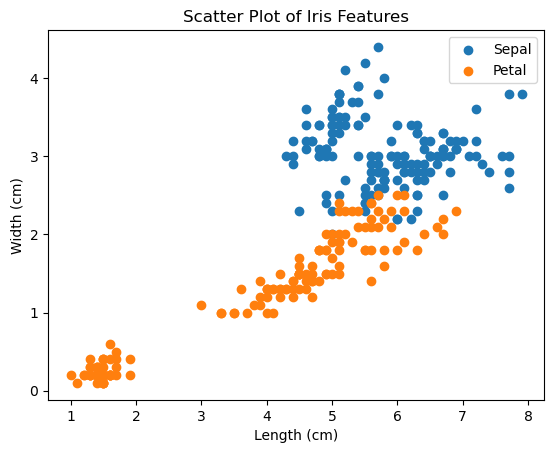

In [102]:
# Scatter plot of Sepal Length vs. Sepal Width
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], label='Sepal')

# Scatter plot of Petal Length vs. Petal Width
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], label='Petal')

# Set the labels and title
plt.xlabel('Length (cm)')
plt.ylabel('Width (cm)')
plt.title('Scatter Plot of Iris Features')

# Add a legend
plt.legend()

# Display the plot
plt.show()

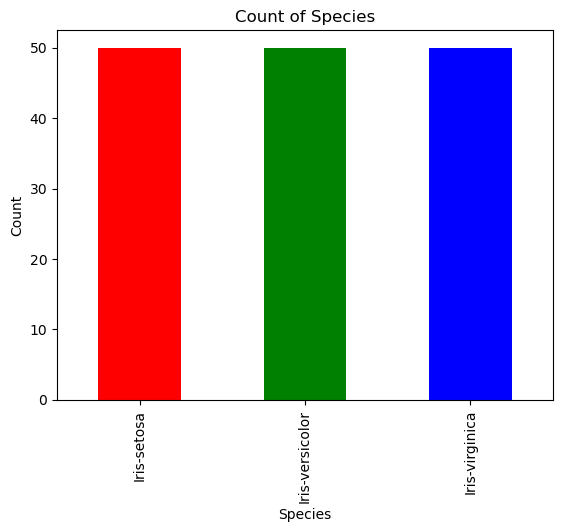

In [105]:
# Count the occurrences of each species
species_count = df['Species'].value_counts()

# Define custom colors for each species
colors = ['red', 'green', 'blue']

# Create a bar chart with custom colors
species_count.plot(kind='bar', color=colors)

# Set the labels and title
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of Species')

# Display the chart
plt.show()

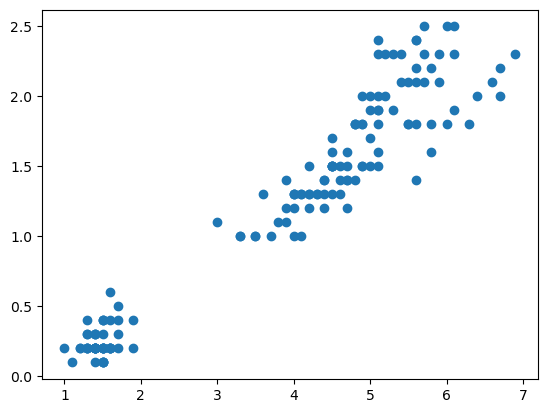

In [65]:
# Scatter plot of Petal Length vs. Petal Width

plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'])

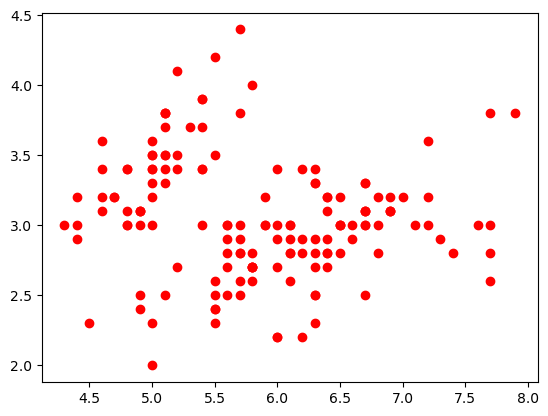

In [66]:
# Scatter plot of Sepal Length vs. Sepal Width

plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], color='red')

## Data preprocessing

In [107]:
# create a new dataframe for only the target variable

target= df['Species']
target.head

<bound method NDFrame.head of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object>

In [108]:
# dropping unnecessary columns to fit perfectly in model

df.drop(['Id', 'Species'], axis=1, inplace=True)

In [78]:
# features dataset

df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [76]:
len(df)

150

In [77]:
len(target)

150

In [81]:
# split into train and test part

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df, target, train_size=0.8)

In [82]:
len(X_train)

120

In [83]:
len(X_test)

30

## Fit the data to machine learning model

In [84]:
# importing decision tree

from sklearn import tree
model = tree.DecisionTreeClassifier()

In [85]:
# create decision tree model

model.fit(X_train,y_train)

DecisionTreeClassifier()

## Perform cross validation to measure the score

In [92]:
# Perform cross-validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, df, target, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Average Score:", scores.mean())

Cross-Validation Scores: [0.96666667 0.96666667 0.9        1.         1.        ]
Average Score: 0.9666666666666668


In [93]:
# Print the best score
best_score = np.max(scores)
print("Best Score:", best_score)

Best Score: 1.0


## Confusion matrix

In [95]:
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 9  0  0]
 [ 0 12  3]
 [ 0  0  6]]


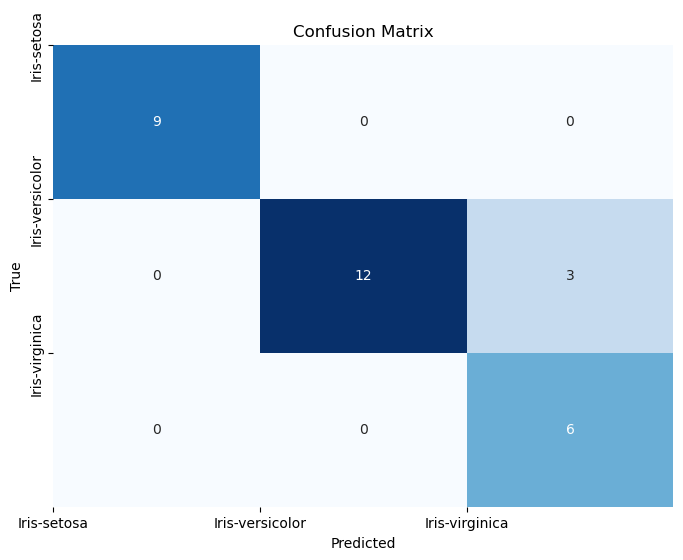

In [94]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained and obtained predictions from your model
# Let's say your predicted labels are stored in y_pred and true labels are stored in y_test

y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the labels list with the unique class labels in your problem
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.yticks(ticks=range(len(labels)), labels=labels)

plt.show()